<a href="https://colab.research.google.com/github/YuvrajTak/CIPHERML_Assignments/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# The Adult Income dataset
**Description**

Title of dataset: adult.csv

**Sources:**

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

**Number of Instances**

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

**Number of Attributes/Fearures/Columns**

* 6 continuous, 8 nominal attributes. 

**Attribute Information/Fearures/Columns**

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

**Missing Values:**

 7% rows have missing values. 








# Importing  Libraries

In [0]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sea;

# Importing DataSet

In [189]:
df= pd.read_csv("/content/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Observation

*   This data set contain some missing values "?"


In [190]:
missing_val = ['?']

df = pd.read_csv('/content/adult.csv', na_values = missing_val)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [191]:
row = df.shape[0]
col = df.shape[1]
df.shape


(48842, 15)

# Observation

*   Number of Rows in Dataset = 48842
*   Number of Columns in Dataset = 15



In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Obervation

     6 continuous, 9 nominal attributes in data set
   
  ** Continuous attributes**
1.   age
2.   fnlwgt
3.   educational-num
4.   capital-gain
5.   capital-loss
6.   hours-per-week
  

 ** nominal attributes**
1.   workclass 
2.   education
3.   material-status
4.   occupation
5.   relationship
6.   race
7.   gender
8.   native-country
9.   income




       



# Find Total Null Values in their columns

In [193]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

**Observation**

Null value contain column **are**

1.   workclass  2799
2.   occuption  2809
3.   native-country  857



# Descriptive Analysis

In [194]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


**Observation**

1.   age of most working people is 38.
1.   Most of people have their native country United-States(43832)
2.   Most of the peoples earn more then 50K (37155)
3.   Most of the people work in private sector (33906)
4.   Most number of peoples are high school graduate (15784)
5.   White peoples have the majority in employment.
6.   Most of working peoples are Male and married.
7.   Most peoples's have their occputation as Prof-specialty 


# Handling Missing Values

In [195]:
df.loc[df["workclass"].isnull(),["occupation","workclass","native-country"]]

,occupation,workclass,native-country
4,NaN,NaN,United-States
6,NaN,NaN,United-States
13,NaN,NaN,United-States
22,NaN,NaN,United-States
35,NaN,NaN,United-States
...,...,...,...
48811,NaN,NaN,United-States
48812,NaN,NaN,United-States
48820,NaN,NaN,United-States
48822,NaN,NaN,United-States


**Observation**
 
when ever  workclass column have null values occuption also have null values.



In [196]:
df.loc[df["native-country"].isnull(),["workclass"]]

,workclass
19,Private
65,Private
83,Self-emp-inc
188,State-gov
253,Federal-gov
...,...
48730,Self-emp-inc
48750,Self-emp-inc
48773,Self-emp-not-inc
48791,Private


# Removing The Missing Values

In [197]:
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [198]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Obervation**

There is No Null values(NaN) in the dataset.


# Removing Useless column

In [0]:
df.drop("fnlwgt",axis=1,inplace=True)

In [200]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**Observation**


*   "fnlwgt" column has removed.



In [201]:
((row - df.shape[0] )/ row) *100

7.411653904426519

Observation
   
   *  7.41% of Rows have removed to handle missing values. 

In [202]:
df


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Observation


*   This data set is ready for Analysis operation.



# UNVARIATE ANALYSIS

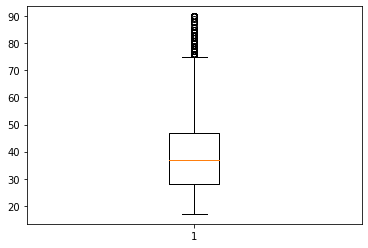

In [203]:
plt.boxplot(df["age"])
plt.show()

Observation


*   The Outliers of age group is more than 75.
*   The Median is 37.



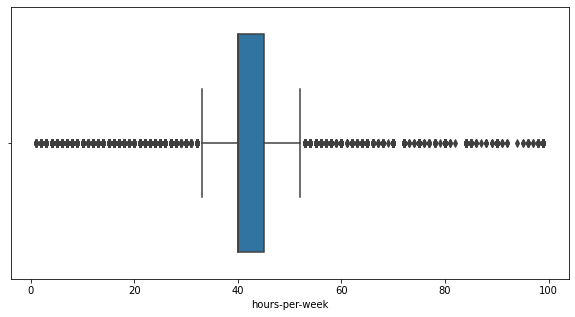

In [204]:
plt.figure(figsize=(10,5))
sea.boxplot(df['hours-per-week'])
plt.show()

Observation

*    Outlier vary in large scale.
*    Median is 40 hours per week.
*    Most Peoples works 35 - 55 hours.



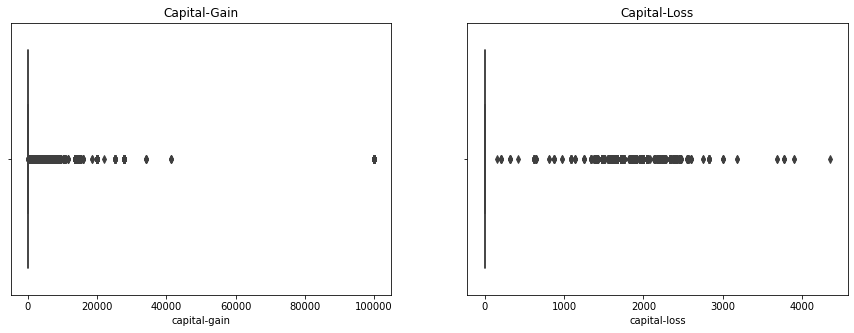

In [205]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sea.boxplot(df['capital-gain'])
plt.title('Capital-Gain')
plt.subplot(122)
sea.boxplot(df['capital-loss'])
plt.title('Capital-Loss')
plt.show()

Observation


*   capital gain and capital loss both graph show that they are full of outlier.



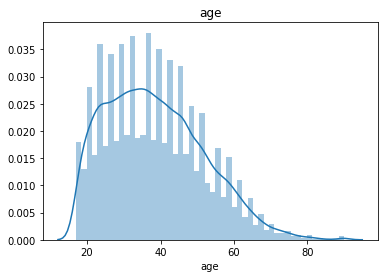

In [206]:

sea.distplot(df['age'])
plt.title('age')
plt.show()

Observation


*   The group of people 17 to 90
*   Most people are under gorup 35-45



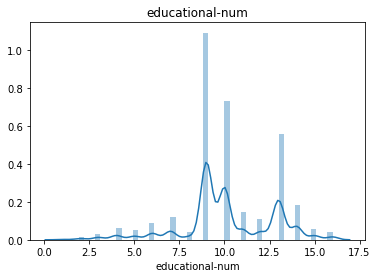

In [207]:
sea.distplot(df['educational-num'])
plt.title('educational-num')

plt.show()

Observation

*   Heightest education-num is at 9




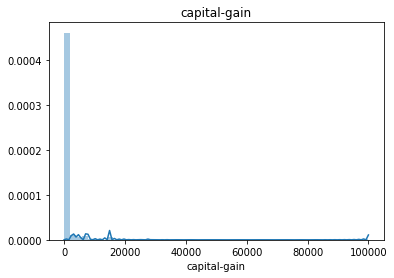

In [208]:
#plt.subplot(1,2,1)
sea.distplot(df['capital-gain'])
plt.title('capital-gain')
plt.show()

Observation


*   Most of people does not gain capital
*   Few people gain huge capital.



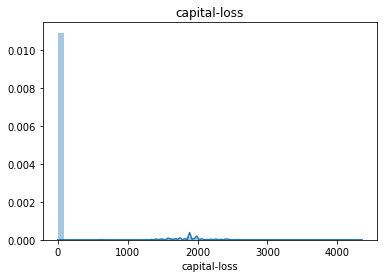

In [209]:
sea.distplot(df['capital-loss'])
plt.title('capital-loss')

plt.show()

Observation

*   Most of people does not gain capital
*   Few people gain huge capital.



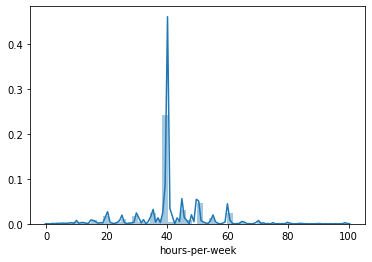

In [210]:
sea.distplot(df["hours-per-week"])
plt.show()

Observation


*    Most of the people work 40 hours per week.



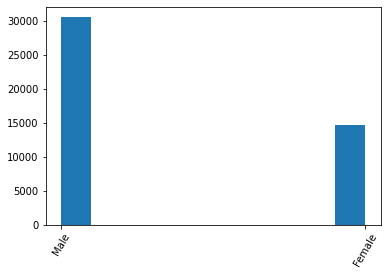

In [211]:
plt.hist(df["gender"])
plt.xticks(rotation=60)           
plt.show()

Observation


*   Most People are Male Gender.



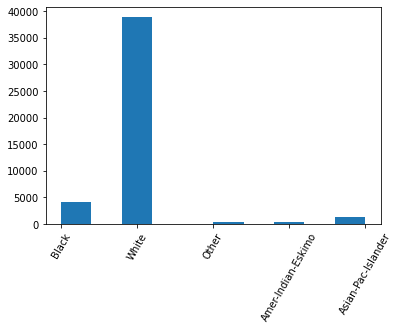

In [212]:
plt.hist(df["race"])
plt.xticks(rotation=60)         
plt.show()

Observation


*   White race dominant
*   Some black race is also available.
*   Other race is negilable.



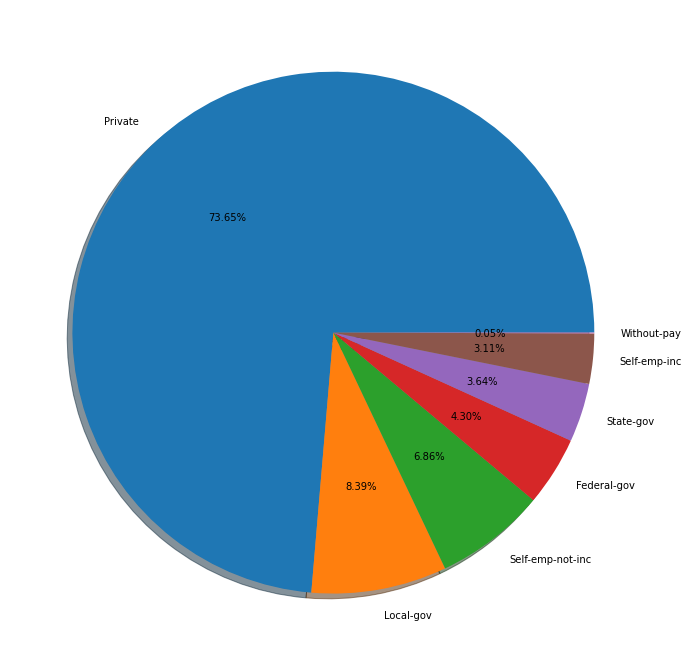

In [213]:
plt.figure(figsize=(15,12))
#mlt.figure(figsize=(10,10))
plt.pie(df["workclass"].value_counts(),autopct='%.2f%%', shadow=True,labels=df.workclass.unique())

         
plt.show()

Observation


*   Most of the people work private.



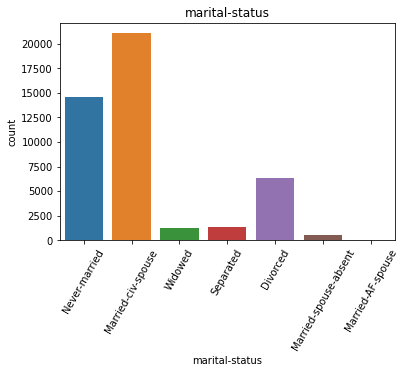

In [214]:
sea.countplot(df['marital-status'])
plt.xticks(rotation=60)
plt.title('marital-status')
plt.show()

Observation
*   This marital-status attribute has 7 unique categories.
*   Never-married and married-civ-spouse two are in majority.

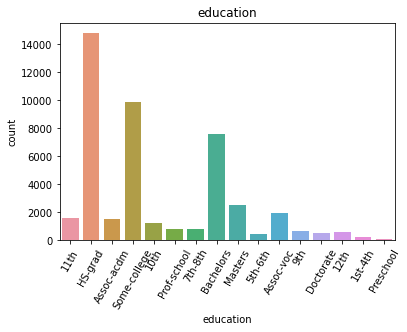

In [215]:
sea.countplot(df['education'])
plt.xticks(rotation=60)
plt.title('education')

plt.show()

Observation


*   There are total 16 catagries.
*   Most of them are Hs-grad.
*   Considerable amount of Assoc-acdm and Bachelors available.



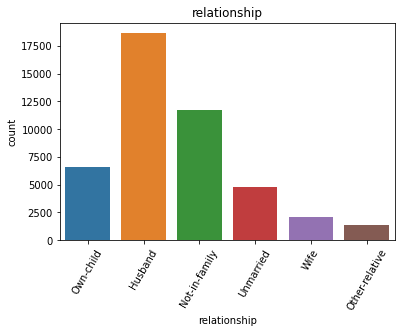

In [216]:
sea.countplot(df['relationship'])
plt.xticks(rotation=60)
plt.title('relationship')

plt.show()

Observation


*   There are 6 catagries of relationship.
*   Heightest around 18000 have Husband.



Text(0.5, 1.0, 'occupation')

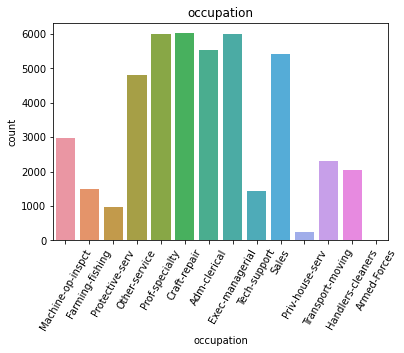

In [217]:
sea.countplot(df['occupation'])
plt.xticks(rotation=60)
plt.title('occupation')

Observation


*   Ther are total 14 catagries.
*   Prof-specialty,Craft-repair and Exec-managerial have almost same maximum count



# Bivariate Analysis

<Figure size 1800x720 with 0 Axes>

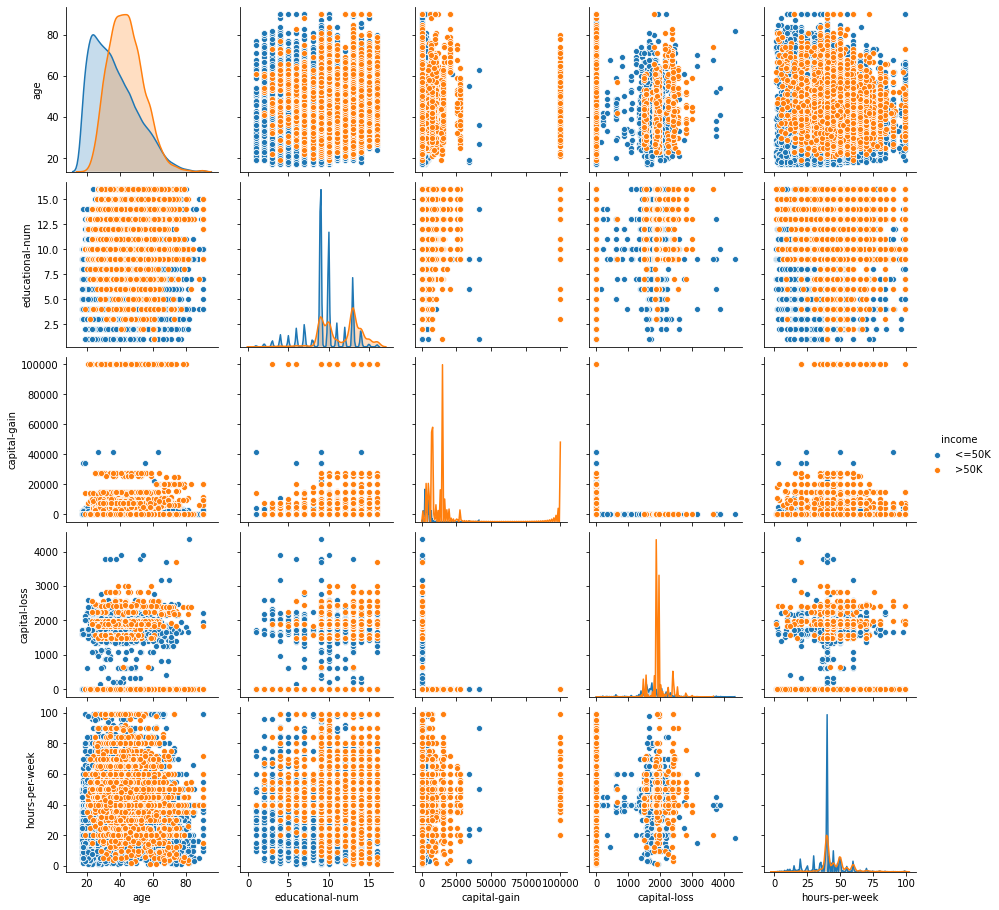

In [218]:
plt.figure(figsize=(25,10))
sea.pairplot(df,hue='income')
plt.show()

Observation
* When age increase income(>=50k) also increase.
* When people have less Income then most capital gain.
* When people having more educational numbers have more income.
* When  educational numbers increase capital gain and also income also increase.
* People with more income are working more hours-per-week. .

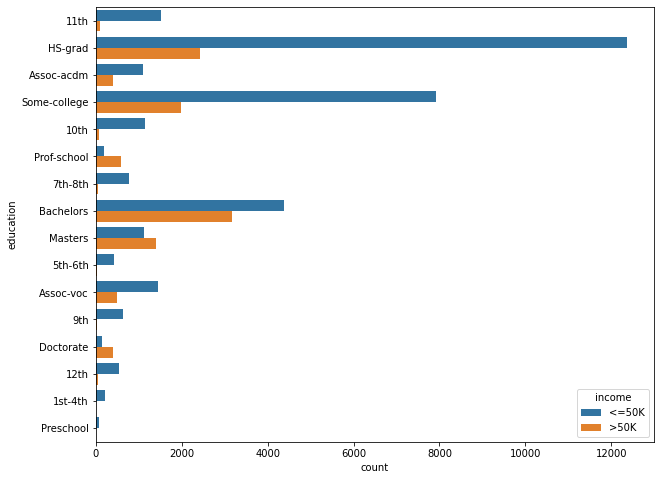

In [219]:
plt.figure(figsize=(10,8))
sea.countplot(y="education",data=df,hue="income")
plt.show()

Observation


*   HS-grad people have in majority but their income is less(<50k)
*   Bachlors degree people get high income



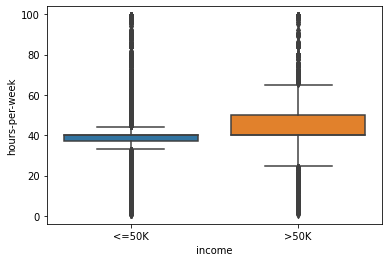

In [220]:


sea.boxplot(y='hours-per-week', x='income',data=df)
plt.show()



Observation


*   People who work more hour-per-week get more income.



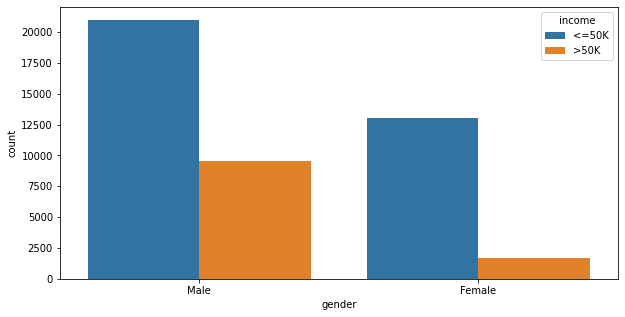

In [221]:
plt.figure(figsize=(10,5))
sea.countplot(x="gender",data=df,hue="income")
plt.show()

Observation


*   Almost half of male people have high income but only few part of female get high income.



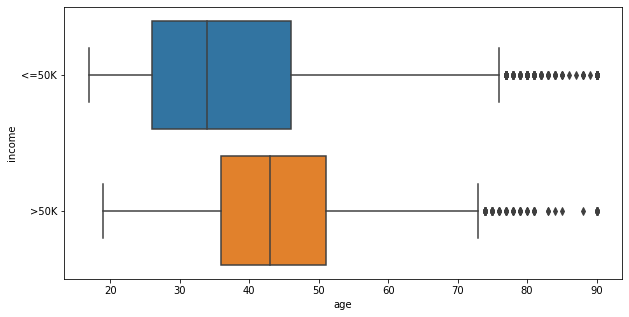

In [222]:
plt.figure(figsize=(10,5))
sea.boxplot(x="age",data=df,y="income")
plt.show()

Observation


*   High income people are under 35-50 age group
*   Less income people are under 25-45 age group



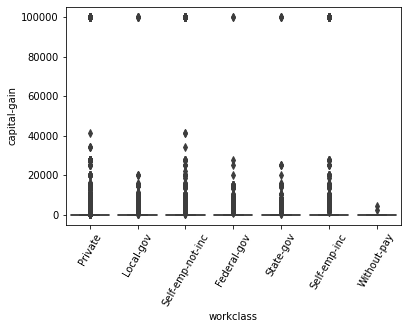

In [223]:

sea.boxplot(y="capital-gain",data=df,x="workclass")
plt.xticks(rotation=60)
plt.show()

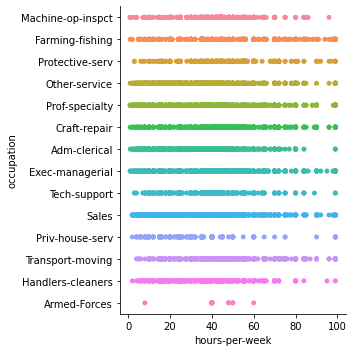

In [224]:
sea.catplot(x="hours-per-week", y="occupation", jitter=False, data=df)
plt.show()

Observation


*   Prof-specialty work more hours per week.




# CONCLUSION
*   Most of people work private.
*   Beacholers have  more income (>50k.)
*   High income people are under 35-50 age group
*   People who work more hour-per-week get more income.
*   Most of the working people is husband.
*   fnlwgt column is removed,because it is not usefull.
*   Almost 7.5% row is deleted cause of missing values.
*   People from USA are working most.
*   White race in majority of working people.



# **Feature** **Transformation** 

In [0]:
from sklearn.preprocessing import MinMaxScaler #import MinMaxScaler from sklearn
mms = MinMaxScaler()
num_col=[]
for i in df:
    if df[i].dtype == "int":
        num_col.append(i)
df[num_col] = mms.fit_transform(df[num_col])

In [233]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
48838,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
48839,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
48840,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


Observation
*   All numerical data column is normilized.

# Using dummy variable for more than two variable data

In [0]:
workclass = pd.get_dummies(df["workclass"],drop_first=True)
education = pd.get_dummies(df["education"],drop_first=True)
marital_status = pd.get_dummies(df["marital-status"],drop_first=True)
occupation = pd.get_dummies(df["occupation"],drop_first=True)
relationship = pd.get_dummies(df["relationship"],drop_first=True)
race = pd.get_dummies(df["race"],drop_first=True)
native_country = pd.get_dummies(df["native-country"],drop_first=True)

# Converting Gender and income column into Binary from

In [239]:
df["gender"].replace(to_replace="Male",value=0,inplace=True)
df["gender"].replace(to_replace="Female",value=1,inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,0,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,0,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,0,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,0,0.000000,0.0,0.295918,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,1,0.000000,0.0,0.377551,United-States,<=50K
48838,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0.000000,0.0,0.397959,United-States,>50K
48839,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,1,0.000000,0.0,0.397959,United-States,<=50K
48840,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0,0.000000,0.0,0.193878,United-States,<=50K


In [240]:
df["income"].replace(to_replace="<=50K",value=0,inplace=True)
df["income"].replace(to_replace=">50K",value=1,inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,0,0.000000,0.0,0.397959,United-States,0
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,0,0.000000,0.0,0.500000,United-States,0
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,0,0.000000,0.0,0.397959,United-States,1
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,0.076881,0.0,0.397959,United-States,1
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,0,0.000000,0.0,0.295918,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,1,0.000000,0.0,0.377551,United-States,0
48838,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0.000000,0.0,0.397959,United-States,1
48839,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,1,0.000000,0.0,0.397959,United-States,0
48840,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0,0.000000,0.0,0.193878,United-States,0


Observation


*   Gender column convert into Binary from.
*   Income column conver into Binary from.

